<a href="https://colab.research.google.com/github/Viorel22/tema3_ia/blob/main/tema3_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Dataset '/content/drive/MyDrive/consumption_user.csv' loaded successfully. Shape: (257952, 80)

Execution Time Results:
FP-Growth: 0.00565 seconds
Apriori:   0.00175 seconds


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


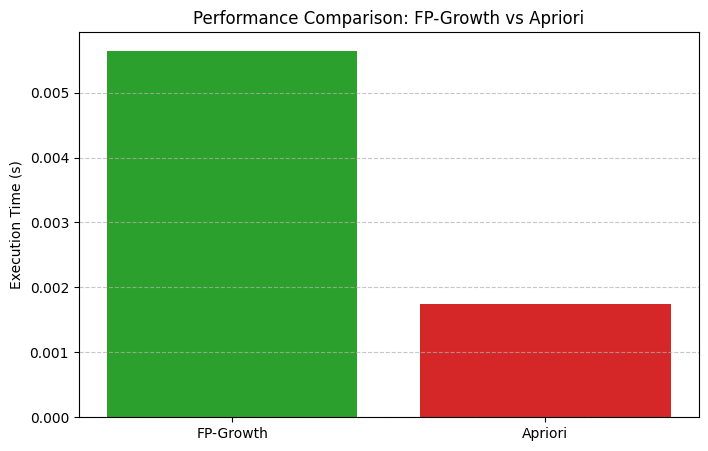


Top Association Rules (Sorted by Lift):
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import io
# from google.colab import files # This line is commented out as files.upload() is no longer used
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules

# 1. Data Loading
# print("Upload the FAO dataset (CSV):") # This line is commented out as files.upload() is no longer used
# uploaded = files.upload() # This line is commented out as files.upload() is no longer used

# if uploaded: # This block is removed as files.upload() is no longer used
filename = '/content/drive/MyDrive/consumption_user.csv'
# filename = next(iter(uploaded))
df = pd.read_csv(filename)
print(f"Dataset '{filename}' loaded successfully. Shape: {df.shape}")

# Identify columns automatically (assuming first column is ID, second is Item)
id_col = df.columns[0]
item_col = df.columns[1]

# 2. Preprocessing
# Grouping by Subject ID to create transaction baskets
transactions = df.groupby(id_col)[item_col].apply(list).tolist()

# One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 3. Algorithm Configuration
MIN_SUPPORT = 0.03
MIN_CONFIDENCE = 0.5
MIN_LIFT = 1.2

# 4. Comparative Analysis
# FP-Growth Execution
t0 = time.time()
fpgrowth_sets = fpgrowth(df_encoded, min_support=MIN_SUPPORT, use_colnames=True)
t1 = time.time()
fp_duration = t1 - t0

# Apriori Execution
t0 = time.time()
apriori_sets = apriori(df_encoded, min_support=MIN_SUPPORT, use_colnames=True)
t1 = time.time()
ap_duration = t1 - t0

# Performance Output
print(f"\nExecution Time Results:")
print(f"FP-Growth: {fp_duration:.5f} seconds")
print(f"Apriori:   {ap_duration:.5f} seconds")

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(['FP-Growth', 'Apriori'], [fp_duration, ap_duration], color=['#2ca02c', '#d62728'])
plt.ylabel('Execution Time (s)')
plt.title('Performance Comparison: FP-Growth vs Apriori')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Rule Generation
rules = association_rules(fpgrowth_sets, metric="lift", min_threshold=MIN_LIFT)

# Filtering results
valid_rules = rules[rules['confidence'] >= MIN_CONFIDENCE].copy()
valid_rules.sort_values(by='lift', ascending=False, inplace=True)

# Display Top Rules
print(f"\nTop Association Rules (Sorted by Lift):")
cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
print(valid_rules[cols].head(10))

# Export
valid_rules.to_csv('association_rules_results.csv', index=False)

# else:
    # print("No file uploaded. Execution aborted.") # This line is commented out as files.upload() is no longer used